<a href="https://colab.research.google.com/github/NicholayKurbatov/MPTI_course_ML/blob/master/MFTI_ML_ex4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math 
%matplotlib inline

#Статистки экспоненциального распределения ($\lambda = 2$)

In [ ]:
# сгенерируем выборку объема 1000
Size, Lambda = 1000, 2
expon_rv = sts.expon(scale=1/Lambda)
sample = expon_rv.rvs(size=Size)

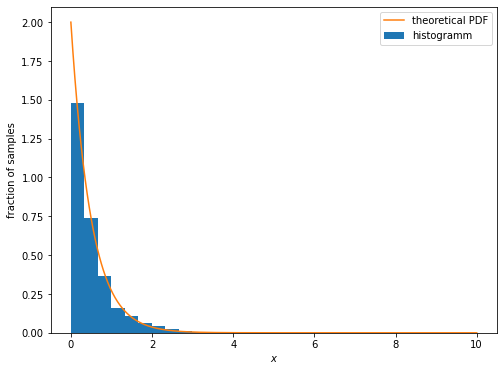

In [ ]:
# заведем теоретические значения DF
x = np.linspace(0,10,1000)
pdf = expon_rv.pdf(x)

fig = plt.figure(figsize=(8,6))
# строим гистограмму 
plt.hist(sample, bins=10, density=True, label='histogramm')
# строим теоретическую функцию плотности
plt.plot(x, pdf, label='theoretical PDF')

plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend()
plt.show()

Теперь вычислим параметры нормального распределения, которым, согласно ЦПТ, будет приближаться распределение выборочных средних при больших объемах выборок.

Т.к. мат. ожидание экспоненциального распределения $EX = 1/\lambda$, а дисперсия $DX = 1/\lambda^2$, то параметры искомого нормального распределения такие $N(\frac{1}{\lambda}, \frac{1}{\sqrt{n}\lambda})$. Здесь $n$ -- объем, измлекаемых выборок.

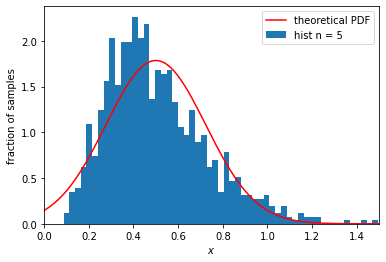

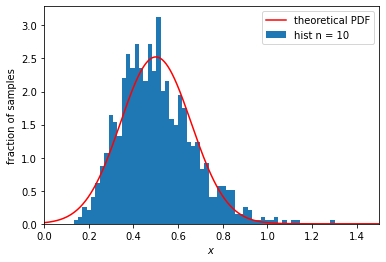

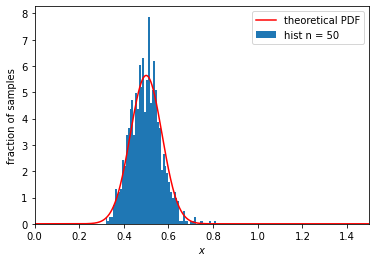

In [ ]:
# объемы выборок
sample_n = [5, 10, 50]
n_x = np.linspace(0,1.5,1000)

# пробегаем по всем значениям sample_n
for i in sample_n:
  mean_set = np.zeros([1000,1])
  # генерируем 1000 выборок при fix n и сразу считаем выборочное среднее
  for k in range(1000):
    mean_set[k] = (expon_rv.rvs(size=i)).mean()
  
  # строим гистограмму 
  plt.hist(mean_set, bins=60, density=True, label='hist n = %.i' % i)
  # строим приближение DF нормальным распределением (согласно ЦПТ)
  norm_rv = sts.norm(1/Lambda, 1/Lambda/math.sqrt(i))
  n_pdf = norm_rv.pdf(n_x)
  plt.plot(n_x, n_pdf, label='theoretical PDF',color='r')

  plt.ylabel('fraction of samples')
  plt.xlabel('$x$')
  plt.legend()
  plt.xlim([0,1.5])
  plt.show()

Согласно данным графикам и гистрограммам можно сделать вывод, что при росте $n$ улучшается точность, с которой мы приближаем распределение выборочных средних нормальным распределением. Видно, что уже при $n=10$ гистрограмма неплохо укладывается на гауссиан с параметрами $N(\frac{1}{\lambda}, \frac{1}{\sqrt{n}\lambda})$. В случае, $n=50$ теоретическая плотность хорошо аппроксимирует построенную гистограмму.

Таким образом, мы убедились в выполнение Центральной предельной теоремы.